In [1]:
#!pip install gym[all]==0.24
from tqdm.notebook import tqdm
import numpy as np
import random
import gym

N_BANDITS = 3
N_EPISODES = 10_000
N_MAX_STEPS_PER_EPISODE = 100

SEED = 0

random.seed(SEED)
np.random.seed(SEED)

In [2]:
class QLearningAgent:
    def __init__(self, n_states, n_actions, learning_rate):
        self.n_states = n_states
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        
        self.q_table = np.zeros((n_states, n_actions))
    
    def act(self, state, epsilon):
        # Randomly generate a number between 0 and 1
        random_int = random.uniform(0,1)
        # if random_int > greater than epsilon --> exploitation
        if random_int > epsilon:
            # Take the action with the highest value given a state
            # np.argmax can be useful here
            action = np.argmax(self.q_table[state])
        # else --> exploration
        else:
            action = random.randint(0, self.n_actions - 1)
        
        return action
    
    def learn(self, state, action, reward, new_state, gamma):
        self.q_table[state][action] = self.q_table[state][action] + self.learning_rate * (reward + gamma * np.max(self.q_table[new_state]) - self.q_table[state][action])   


In [3]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)

agent = QLearningAgent(n_states=env.observation_space.n, n_actions=env.action_space.n, learning_rate=LEARNING_RATE)

In [4]:
# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05            # Minimum exploration probability 
decay_rate = 0.001            # Exponential decay rate for exploration prob
gamma = 0.95

rewards = []
epsilon_history = []

for episode in tqdm(range(N_EPISODES)):
    state = env.reset()
    done = False
    
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    
    total_reward = 0

    render_frequency = 100

    for step in range(N_MAX_STEPS_PER_EPISODE):
        action = agent.act(state=state, epsilon=epsilon)

        new_state, reward, done, info = env.step(action)
        
        agent.learn(state, action, reward, new_state, gamma)
        
        total_reward += reward

        # If done, finish the episode
        if done:
            break
      
        # Our state is the new state
        state = new_state

        if episode % render_frequency == 0:
            env.render()     
        #env.render()
        
    #print(f"Total reward for episode {episode}: {total_reward}")
    
    rewards.append(total_reward)
    epsilon_history.append(epsilon)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
agent.q_table

array([[0.73509189, 0.76467109, 0.77378094, 0.73509189],
       [0.73509189, 0.        , 0.81450625, 0.77378094],
       [0.77378094, 0.857375  , 0.77378094, 0.81450625],
       [0.81450625, 0.        , 0.72746381, 0.73434058],
       [0.67948437, 0.81225947, 0.        , 0.73509189],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.        , 0.81450625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.23664222, 0.        , 0.85723767, 0.40372554],
       [0.70867978, 0.85341442, 0.9025    , 0.        ],
       [0.857375  , 0.95      , 0.        , 0.857375  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.59946082, 0.95      , 0.73927753],
       [0.9025    , 0.95      , 1.        , 0.9025    ],
       [0.        , 0.        , 0.        , 0.        ]])

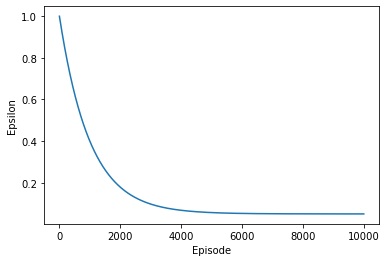

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(N_EPISODES), epsilon_history)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.show()

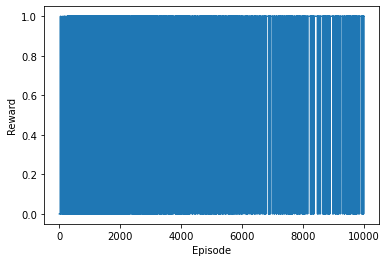

In [ ]:
plt.plot(range(N_EPISODES), rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

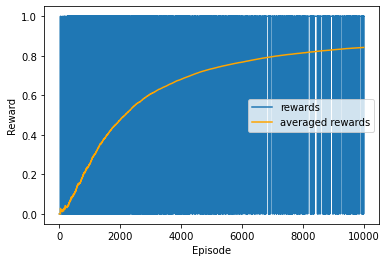

In [ ]:
def smoothen(data):
    return np.cumsum(data) / np.arange(len(rewards) + 1)[1:]

rewards_smooth_window_5 = smoothen(rewards)

plt.plot(range(N_EPISODES), rewards)
plt.plot(range(N_EPISODES), rewards_smooth_window_5, color="orange")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend(["rewards", "averaged rewards"])
plt.show()

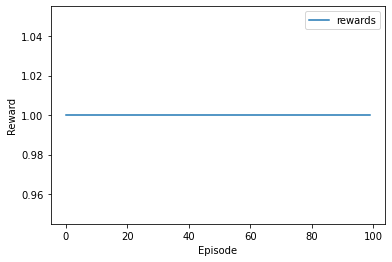

In [ ]:
def smoothen(data):
    return np.cumsum(data) / np.arange(len(rewards) + 1)[1:]

rewards_smooth_window_5 = smoothen(rewards)

plt.plot(range(100), rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend(["rewards", "averaged rewards"])
plt.show()